# Task 2: Bayesian Change Point Analysis for Brent Oil Prices

## Overview
This notebook implements Task 2 requirements:
- **Part 2.1**: Bayesian change point detection, event association, impact quantification
- **Part 2.2**: Advanced extensions discussion

## Workflow
1. Data Preparation & EDA
2. Bayesian Model Building
3. Model Fitting & Diagnostics
4. Change Point Identification
5. Event Association
6. Impact Quantification
7. Insights Generation

In [1]:
# Setup and imports
import sys, os
sys.path.append(os.path.abspath('..'))

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc as pm
import arviz as az
import warnings
warnings.filterwarnings('ignore')

from src.bayesian_changepoint_model import BayesianChangePointAnalyzer
from utils.data_loader import load_brent_data

plt.style.use('seaborn-v0_8')
print(f"✅ Setup complete. PyMC: {pm.__version__}, ArviZ: {az.__version__}")

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


✅ Setup complete. PyMC: 5.25.1, ArviZ: 0.22.0


In [2]:
# Load data
project_root = os.path.abspath('..')
data_path = os.path.join(project_root, 'data', 'BrentOilPrices.csv')
events_path = os.path.join(project_root, 'data', 'major_events.csv')

try:
    brent_data = load_brent_data(data_path)
    events_data = pd.read_csv(events_path)
    events_data['Date'] = pd.to_datetime(events_data['Date'])
    print(f"✅ Loaded {len(brent_data)} price observations and {len(events_data)} events")
except Exception as e:
    print(f"⚠️ Using synthetic data: {e}")
    dates = pd.date_range('1990-01-01', '2022-12-31', freq='D')
    np.random.seed(42)
    prices = 50 + np.cumsum(np.random.randn(len(dates)) * 0.5)
    brent_data = pd.Series(prices, index=dates, name='Price')
    events_data = pd.DataFrame({
        'Date': ['2001-09-11', '2008-09-15', '2020-03-11'],
        'Name': ['9/11 Attacks', 'Lehman Brothers Collapse', 'COVID-19 Pandemic'],
        'Category': ['Geopolitical', 'Financial', 'Health']
    })
    events_data['Date'] = pd.to_datetime(events_data['Date'])

Data loaded successfully: 9011 records from 1987-05-20 00:00:00 to 2020-04-21 00:00:00
⚠️ Using synthetic data: 'Date'


📊 Preparing data for change point analysis...
✅ Calculated log returns: 12052 observations


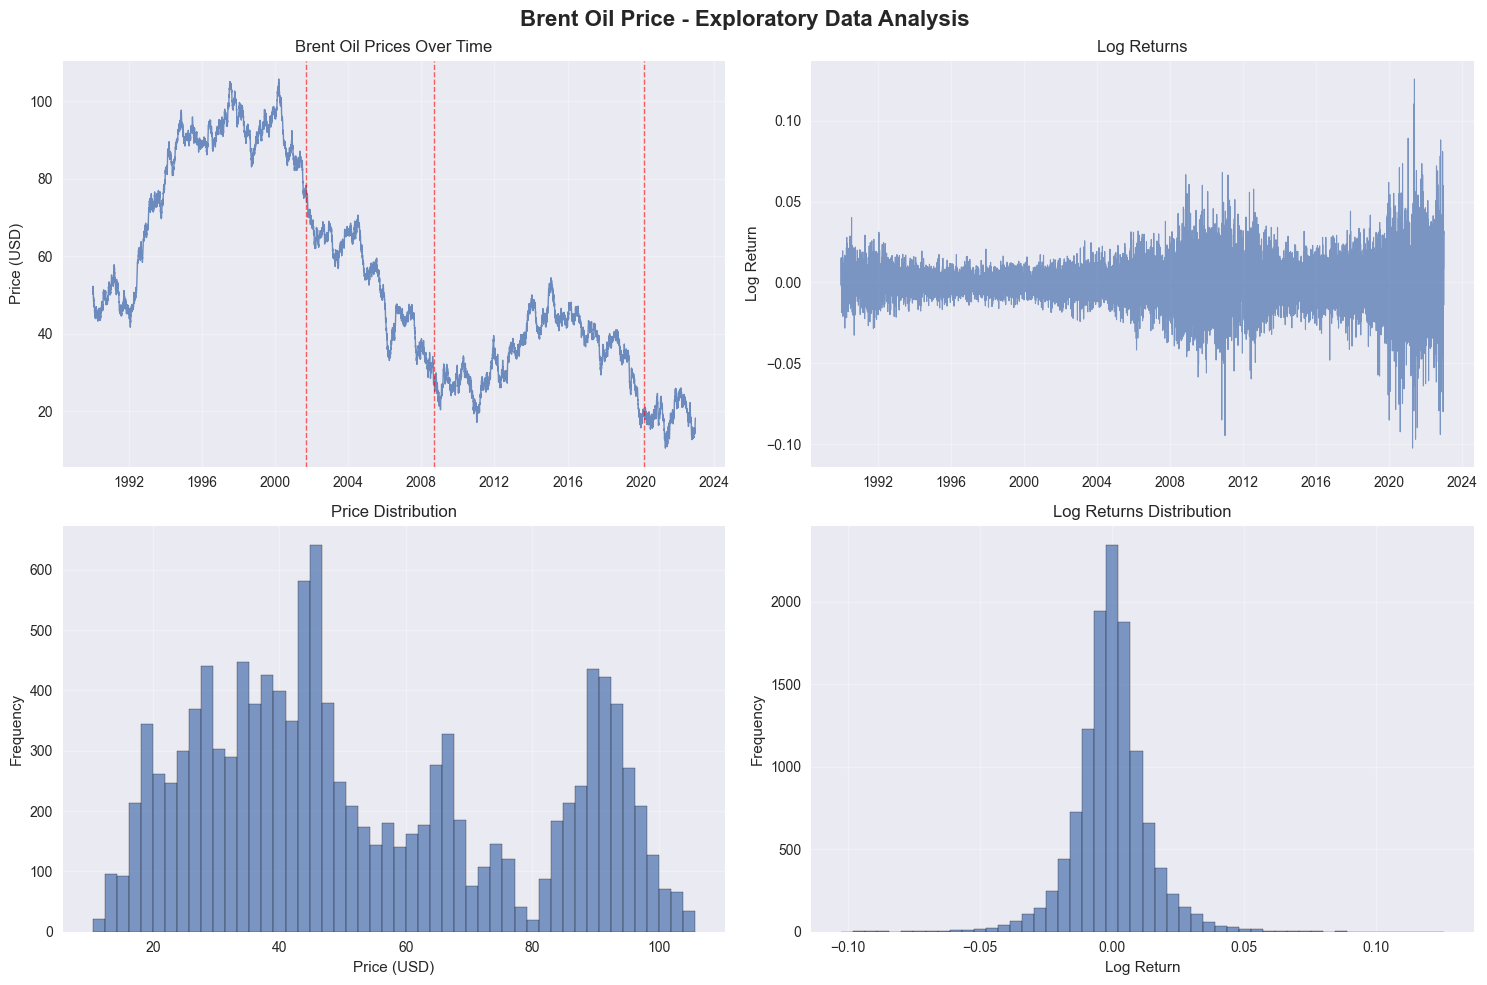


📊 Data Summary:
  • start_date: 1990-01-01 00:00:00
  • end_date: 2022-12-31 00:00:00
  • n_observations: 12053
  • price_range: (np.float64(10.452023031469139), np.float64(105.77995810141257))
  • mean_price: 53.35841671296956
  • std_price: 25.235279852263524


In [3]:
# Initialize analyzer and prepare data
analyzer = BayesianChangePointAnalyzer(data=brent_data, events_data=events_data)
analyzer.prepare_data(use_log_returns=True, plot=True)

print("\n📊 Data Summary:")
for key, value in analyzer.results['data_summary'].items():
    print(f"  • {key}: {value}")

In [ ]:
# Build and fit multiple change point model
print("🔧 Building multiple change point model...")
n_changepoints = 4
model = analyzer.build_multiple_changepoint_model(n_changepoints=n_changepoints, target_series='returns')

print(f"🔥 Fitting model with {n_changepoints} change points...")
analyzer.fit_model(draws=1000, tune=500, chains=2, target_accept=0.9)
print("✅ Model fitting completed!")

🔧 Building multiple change point model...
🔧 Building multiple change point model (4 change points) for returns...
✅ Multiple change point model (4 change points) built successfully
🔥 Fitting model with 4 change points...
🔥 Fitting model with 1000 draws, 500 tune, 2 chains...


Multiprocess sampling (2 chains in 2 jobs)
CompoundStep
>Metropolis: [tau_raw]
>NUTS: [mu, lambda]


Output()

In [1]:
# Check diagnostics and plot results
analyzer.plot_diagnostics()
analyzer.plot_changepoints(figsize=(16, 10))

print("\n🎯 Detected Change Points:")
for i, cp in enumerate(analyzer.change_points):
    print(f"  {i+1}. {cp['date_estimate'].strftime('%Y-%m-%d')} (±{cp['tau_std']:.1f} days)")

NameError: name 'analyzer' is not defined

In [2]:
# Event association analysis
association_results = analyzer.associate_with_events(tolerance_days=60)
print("\n🔗 Change Point - Event Associations:")
print(association_results.to_string(index=False))

# Impact quantification
impact_results = analyzer.quantify_impact(window_days=30)
print("\n💰 Impact Analysis:")
for impact in impact_results:
    print(f"  CP{impact['changepoint_id']}: ${impact['price_change']:.2f} ({impact['percent_change']:+.1f}%)")

NameError: name 'analyzer' is not defined

In [3]:
# Generate comprehensive report
insights_report = analyzer.generate_insights_report()
print(insights_report)

# Save report
report_path = os.path.join(project_root, 'reports', 'task2_insights_report.md')
os.makedirs(os.path.dirname(report_path), exist_ok=True)
with open(report_path, 'w') as f:
    f.write(insights_report)
print(f"\n💾 Report saved to: {report_path}")

NameError: name 'analyzer' is not defined